In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

In [2]:
df = pd.read_csv("adult dd- Copy.csv",header=None)

In [3]:
with open('adult.names') as names:
    names_data = names.read()
    
with open('adult.test') as test:
    test_data = test.read()

In [4]:
#print(names_data)

In [5]:
s = '''age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,captalloss,hoursperweek,nativecountry,target'''
s = s.split(',')

In [6]:
df.columns = s

In [7]:
df['target_new'] = df['target'].apply(lambda ins : 0 if ins == ' <=50K' else 1)

In [8]:
df.drop(['target'],axis=1,inplace=True)

In [9]:
idxs = []
j = 0
for j,i in enumerate(df.itertuples()):
    if i.nativecountry == ' ?' or i.occupation == ' ?' or i.workclass == ' ?':
        idxs.append(j)
print(len(idxs))  

df[df == ' ?'] = np.nan
cols = ['nativecountry','occupation','workclass']
for col in cols:
    df[col].fillna(df[col].mode()[0],inplace=True)

2399


In [10]:
req_cols = [ 'workclass','education','maritalstatus','occupation','relationship','race','sex','nativecountry',]
for col in req_cols:
    print(f'TOTAL :  {len(df[col].value_counts())}')
    print(f'The total value count of {col} is {df[col].value_counts()} ')   
    print('\n\n')

TOTAL :  8
The total value count of workclass is  Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 



TOTAL :  16
The total value count of education is  HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64 



TOTAL :  7
The total value count of maritalstatus is  Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Mar

In [11]:
# df.drop(idxs,axis=0,inplace=True)

In [12]:
df.head(3)

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,captalloss,hoursperweek,nativecountry,target_new
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0


In [13]:
req_features = ['workclass','education','maritalstatus','occupation','relationship','race','sex','nativecountry']
for feature in req_features:
    le = preprocessing.LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
#     X_test[feature] = le.transform(X_test[feature])

In [14]:
X = df.drop(['target_new'],axis = 1).values
y = df['target_new'].values

print(X.shape,y.shape)

(32561, 14) (32561,)


In [15]:
# from imblearn.combine import SMOTEENN
# sme = SMOTEENN(random_state=42)
# X_res, y_res = sme.fit_resample(X, y)

from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_res, y_res = nm.fit_resample(X, y)
print(X_res.shape,y_res.shape)

(15682, 14) (15682,)


In [16]:
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 7841, 1: 7841})


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [19]:
from sklearn import preprocessing

In [20]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [24]:
# classifier = LogisticRegression()
classifier = SVC()
# classifier = RandomForestClassifier()
# classifier = DecisionTreeClassifier()

In [25]:
classifier.fit(X_train,y_train)

SVC()

In [26]:
pred = classifier.predict(X_test)

In [27]:
print(accuracy_score(y_test,pred))

0.819254064392732


In [28]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[1260  295]
 [ 272 1310]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1555
           1       0.82      0.83      0.82      1582

    accuracy                           0.82      3137
   macro avg       0.82      0.82      0.82      3137
weighted avg       0.82      0.82      0.82      3137



In [29]:
## Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
y_train = y_train.reshape(y_train.shape[0],1)

In [31]:
X_train.shape,y_train.shape

((12545, 14), (12545, 1))

In [32]:
model = Sequential()
model.add(Dense(20,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

cb_ES = [EarlyStopping(patience=10,mode='min',restore_best_weights=True)]

history = model.fit(X_train,y_train,epochs=200,callbacks=cb_ES,batch_size=32,validation_data=(X_test,y_test),shuffle=True)

W0918 18:49:47.587024  4288 deprecation.py:506] From c:\users\pankaj choudhary\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0918 18:49:47.757926  4288 deprecation.py:323] From c:\users\pankaj choudhary\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                300       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 741
Trainable params: 741
Non-trainable params: 0
_________________________________________________________________
Train on 12545 samples, validate on 3137 samples
Epoch 1/200
12545/12545 [==============================] - 1s 84us/sample - loss: 0.5021 - acc: 0.7428 - val_loss: 0.4444 - val_acc: 0.7880
Epoch 2/200
12545/12545 [==============================] - 1s 71us/sample - loss: 0.4028 - acc: 0.8065 - val_loss: 0.3994 - val_acc: 0.8081
Epoch 3/200
12545/12545 [==============================] - 

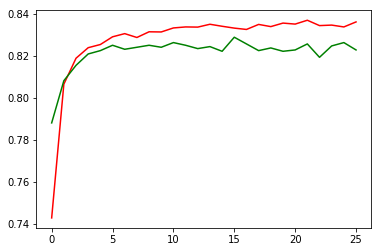

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'],c='red')
plt.plot(history.history['val_acc'],c='green')
plt.show()

In [34]:
y_pred = model.predict_classes(X_test)

In [35]:
print(accuracy_score(y_test,y_pred))

0.8288173414089894


In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1555
           1       0.82      0.85      0.83      1582

    accuracy                           0.83      3137
   macro avg       0.83      0.83      0.83      3137
weighted avg       0.83      0.83      0.83      3137



#### END